# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [130]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [131]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [132]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [133]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [134]:
#  3. Get the total amount of fares for each city type
sum_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [135]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_per_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [136]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = sum_fares / total_drivers
avg_fare_per_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [137]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
        {"Total Rides": total_rides,
          "Total Drivers": total_drivers,
          "Total Fares": sum_fares,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [138]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [139]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

# Display the data frame
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [8]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

NameError: name 'pd' is not defined

In [9]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# sum_of_fares_by_date_and_type = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
# sum_of_fares_by_date_and_type.head()

sum_of_fares_by_date_and_type = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
sum_of_fares_by_date_and_type.head()


NameError: name 'pyber_data_df' is not defined

In [10]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_of_fares_by_date_and_type = sum_of_fares_by_date_and_type.reset_index()
sum_of_fares_by_date_and_type

NameError: name 'sum_of_fares_by_date_and_type' is not defined

In [11]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
# sum_of_fares_by_date_and_type = sum_of_fares_by_date_and_type.pivot_table(sum_of_fares_by_date_and_type, values='fare', index=['date',],
                   # column=['type'], aggfunc=np.sum)
#sum_of_fares_by_date_and_type.pivot_
sum_of_fares_by_date_and_type=pd.pivot_table(pyber_data_df, values='fare', index=['date'],
                    columns=['type'], aggfunc=np.sum)

sum_of_fares_by_date_and_type.head()

# sum_of_fares_by_date_and_type=pd.pivot_table(sum_of_fares_by_date_and_typ, values='fare', index=['date'],
#                      columns=['type'], aggfunc=np.sum)

# sum_of_fares_by_date_and_type.head()

NameError: name 'pd' is not defined

In [12]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# to get the total fares for each type of city by the date. 
# sum_of_fares_by_date_and_type_df =sum_of_fares_by_date_and_type_df.loc['2019-01-01':'2019-04-28', :]
# sum_data_df = pd.DataFrame(sum_of_fares_by_date_and_type)
# print(sum_data_df)
# sum_data_df.loc['2019-01-01':'2019-04-28', :]

In [13]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sum_data_df.index = pd.to_datetime(sum_data_df.index)
sum_data_df.tail(10)

NameError: name 'pd' is not defined

In [14]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_data_df.info()

NameError: name 'sum_data_df' is not defined

In [15]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#resample()
 
weekly_resampled_data_df= sum_data_df.resample('W').sum()
weekly_resampled_data_df.head(5)

NameError: name 'sum_data_df' is not defined

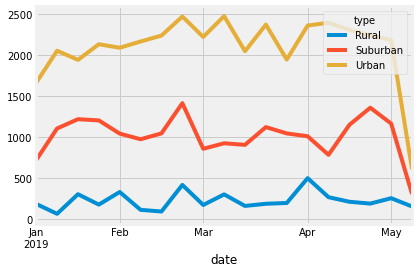

Text(0, 0.5, 'Fare($USD)')

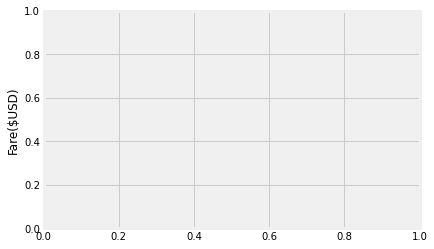

In [256]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.style.use('fivethirtyeight')
x = np.linspace(0, 10)
fig, ax = plt.subplots()

%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

weekly_resampled_data_df.plot()
plt.show()

plt.ylabel("Fare($USD)")
# # Create the plot.
# plt.plot(x_axis, y_axis, marker="*", color="blue", linewidth=2, label='Boston')
# # Create labels for the x and y axes.
# plt.xlabel("")
#plt.ylabel("Fare($USD)")
# # Set the y limit between 0 and 45.
# plt.ylim(0, 45)
# # Create a title.
# plt.title("Total Fare by City Type")
# # Add a grid.
# plt.grid()
# # Add the legend.
# plt.legend()



# # Draw Plot
# mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']      
# plt.figure(figsize=(16,10), dpi= 80)
